This chapter discusses how the following training algorithms behave under the hood: 
- Linear Regression
- Polynomial Regression
- Logistic Regression
- Softmax Regression.

# Linear Regression

*Equation 1: Linear Regression model prediction*

\begin{equation*}
\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2\;+\;...\;+\;\theta_nx_n
\end{equation*}

$
\bullet \;\hat{y}\small{\text{ is the predicted value.}}\\
\bullet n\small{\text{ is the number of features.}}\\
\bullet x_i\small{\text{ is the }i^{th}\text{ feature value.}}\\
$

*Equation 2: Linear Regression model prediction (vectorized form)*

\begin{equation*}
\hat{y} = h_\boldsymbol{\theta}(\mathbf{x}) = \boldsymbol{\theta}\cdot\mathbf{x}
\end{equation*}

$
\bullet \;\boldsymbol{\theta}\small{
    \text{ is the model's parameter vector, containing the bias term }
    \theta_0
    \text{ and the feature weights }
    \theta_1
    \text{ to }
    \theta_n
}.\\
\bullet \;\mathbf{x}\small{
    \text{ is the instance's feature vector, containing }
    x_0
    \text{ to }
    x_n
    \text{, with }
    x_0
    \text{ always equal to 1}
}.\\
\bullet \;\boldsymbol{\theta}\cdot\mathbf{x}\small{
    \text{ is the dot product of the vectors }
    \boldsymbol{\theta}
    \text{ and }
    \mathbf{x}
    \text{, which is equal to }
    \theta_0 + \theta_1x_1 + \theta_2x_2\;+\;...\;+\;\theta_nx_n
}.\\
\bullet \;h_\boldsymbol{\theta}\small{
    \text{ is the hypothesis function, using the model parameters }
    \boldsymbol{\theta}
}.\\
$

*Equation 3: Mean Square Error (MSE) cost function for a Linear Regression model*

\begin{equation*}
\text{MSE}(\mathbf{X}, h_\boldsymbol{\theta}) = \frac{1}{m}\sum_{i=1}^m (\boldsymbol{\theta}^\mathrm{T}\mathbf{x}^{(i)}-y^{(i)})^2
\end{equation*}

Training Linear Regression models involves finding a parameter vector that minimizes the Root Mean Square Error (RMSE).

The Normal Equation is a closed-form solution to this problem.

*Equation 4: Normal Equation*

\begin{equation*}
\hat{\boldsymbol{\theta}} = (\mathbf{X}^{\mathrm{T}}\mathbf{X})^{-1}\mathbf{X}^{\mathrm{T}}\mathbf{y}
\end{equation*}

$
\bullet \;\hat{\boldsymbol{\theta}}\small{
    \text{ is the value of }
    \boldsymbol{\theta}
    \text{ that minimizes the cost function }
}.\\
\bullet \;\mathbf{y}\small{
    \text{ is the vector of target values containing }
    y^{(1)}
    \text{ to }
    y^{(m)}
}.\\
$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

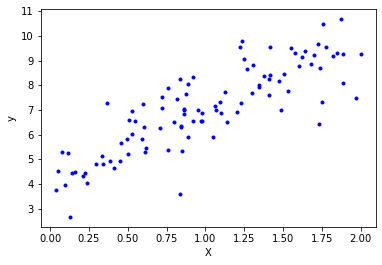

In [2]:
# Linear-ish random data to demonstrate the Normal Equation
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [3]:
# Add x0 = 1 to each instance of X
X_b = np.c_[np.ones((100, 1)), X]

# Apply the Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.34061689],
       [2.71090852]])

A perfect solution would be $\theta_0 = 4$ and $\theta_1 = 3$, since the random data was generated using $y = 4 + 3x_1 +$ some Gaussian noise.

In [4]:
# Use the parameter vector to predict y values for x1 = 0 and x1 = 2
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.34061689],
       [9.76243392]])

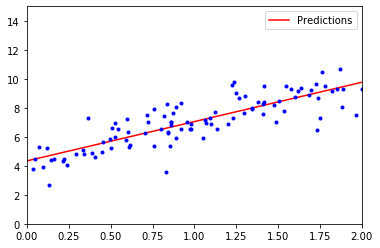

In [5]:
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

In [6]:
# Using Scikit-Learn's LinearRegression class
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.34061689]), array([[2.71090852]]))

In [7]:
lin_reg.predict(X_new)

array([[4.34061689],
       [9.76243392]])

In [8]:
# LinearRegression is based on scipy's least squares function scipy.linalg.lstsq()
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.34061689],
       [2.71090852]])

scipy.linalg.lstsq() computes $\hat{\boldsymbol{\theta}} = \mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^+$ is the pseudoinverse of $\mathbf{X}$.

In [9]:
# Calculate using the pseudoinverse
np.linalg.pinv(X_b).dot(y)

array([[4.34061689],
       [2.71090852]])

Using the pseudoinverse is both more efficient and more general than the Normal Equation.

## Gradient Descent

Gradient Descent is an algorithm that iteratively tweaks parameters in order to minimize a cost function (such as the MSE cost function in the case of Linear Regression). The amount the parameter changes is proportional to the slope so the steps get smaller as the parameters approach the minimum.

**Batch Gradient Descent** uses the entire training set to compute the gradients at each step.

*Equation 5: Partial derivatives of the MSE cost function*

\begin{equation*}
\frac{\partial}{\partial \theta_j}\text{MSE}(\boldsymbol{\theta}) = 
\frac{2}{m}\sum^m_{i=1}(\boldsymbol{\theta}^\mathrm{T}\mathbf{x}^{(i)}-y^{(i)})x^{(i)}_j
\end{equation*}

*Equation 6: Gradient vector of the cost function*

\begin{equation*}
\nabla_{\boldsymbol{\theta}}\text{MSE}(\boldsymbol{\theta})=
\begin{pmatrix}
\frac{\partial}{\partial\theta_0}\text{MSE}(\boldsymbol{\theta})\\
\frac{\partial}{\partial\theta_1}\text{MSE}(\boldsymbol{\theta})\\
\vdots\\
\frac{\partial}{\partial\theta_n}\text{MSE}(\boldsymbol{\theta})\\
\end{pmatrix}=
\frac{2}{m}\mathbf{X}^\mathrm{T}(\mathbf{X}\boldsymbol{\theta}-\mathbf{y})
\end{equation*}

*Equation 7: Gradient Descent step*

\begin{equation*}
\boldsymbol{\theta}^\text{(next step)}=\boldsymbol{\theta}-\eta\nabla_\boldsymbol{\theta}\text{MSE}(\boldsymbol{\theta})
\end{equation*}

$\eta$ represents the learning rate hyperparameter, which determines the size of each step.

In [10]:
# Hyperparameters
eta = 0.1
n_iterations = 1000
m = 100

# Some random initialization
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [11]:
theta

array([[4.34061689],
       [2.71090852]])

This is the same result as from the Normal Equation. If $\eta$ was set to a smaller value, it would take much longer to converge; if it was larger, it would likely overshoot and diverge.

**Stochastic Gradient Descent** uses a random instance in the training set for each step to compute the gradients. This is faster and scales better than Batch Gradient Descent, but will take more iterations to determine less optimal final parameters.

The random nature of this algorithm makes it less likely to get caught in local optima, but since it can't converge like Batch Gradient descent the learning rate must be handled differently.

One example is a learning schedule, which reduces the learning rate over the number of iterations.

In [12]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

In [13]:
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [14]:
theta

array([[4.33488163],
       [2.69030809]])

In [15]:
from sklearn.linear_model import SGDRegressor

# This will continue for 1000 epochs or until the loss drops by less than 0.001 (tolerance)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.31373979]), array([2.76585954]))

**Mini-batch Gradient Descent** provides a compromise between Stochastic and Batch Gradient Descent algorithms, in that it iterates over small batches of random instances for each step. It is both faster than Batch and less erratic than Stochastic.

In [17]:
n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200, 1000

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients

In [18]:
theta

array([[4.31670686],
       [2.68752545]])

# Polynomial Regression

Polynomial regression involves using a linear model to fit nonlinear data by adding new features in the form of powers of existing features.

In [73]:
# Generate a sample of nonlinear data using the quadratic equation
np.random.seed(47)
m = 100
X = 3 * np.random.rand(m, 1)
y = 0.5 * X**2 + X * 2 + np.random.randn(m, 1) / 1.5

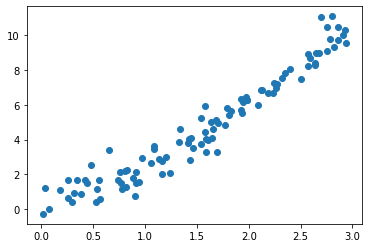

In [74]:
plt.scatter(X, y)
plt.show()

In [75]:
# PolynomialFeatures can generate powers of features through transformation
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Expected result
X[0], X[0] ** 2

(array([0.34046542]), array([0.1159167]))

In [76]:
# New feature set
X_poly[0]

array([0.34046542, 0.1159167 ])

In [77]:
# Train a linear regression model with the new feature set
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([0.44762828]), array([[1.3464956 , 0.71105187]]))

In [80]:
# Generate some test data and transform it
X_new = np.linspace(0, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)

# Predict the output
y_new = lin_reg.predict(X_new_poly)

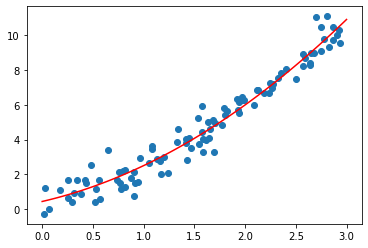

In [81]:
# Check the fit
plt.scatter(X, y)
plt.plot(X_new, y_new, 'r-')
plt.show()

# Learning Curves

Changing the degree for Polynomial Regression will impact the fit quality. A purely linear model (or first-degree polynomial) would underfit this data, whereas a 300-degree polynomial would overfit.

**Learning curves** are useful for visualizing a model's training performance to determine whether it is over- or underfitting the data.

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[m:])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[m:], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='Training')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='Validation')
    plt.legend()

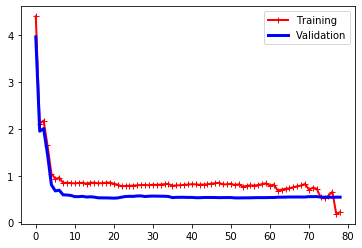

In [83]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

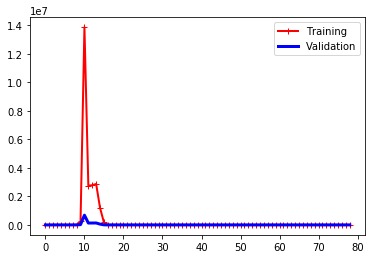

In [84]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

- **Bias error** is due to inaccurate assumptions about the data, such as attempting to fit a quadratic distribution with a purely linear model. High bias error often results in underfitting.

- **Variance error** is due to oversensitivity to small variations in the data, such as an overly high-degree polynomial model. High variance error often results in overfitting.

- **Irreducible error** is due to noise, and can typically only be reduced by cleaning up the data.

# Regularized Linear Models

One way to reduce overfitting is to regularize (or constrain) the model. Reducing the weights in linear models or the degrees in polynomial models are examples of regularization.

## Ridge Regression

**Ridge Regression** is a regularized version of linear regression with a regularization term added to the cost function equal to half the square of the $\ell_2$ norm of the weight vector.

*Equation 8: Ridge Regression cost function*

\begin{equation*}
J(\boldsymbol{\theta})=\text{MSE}(\boldsymbol{\theta})+\alpha\frac{1}{2}\sum^n_{i=1}\theta_i^2
\end{equation*}

- Regularized cost functions are typically only used during training
- Performance should be evaluated using the unregularized cost function ($\alpha=0$ for ridge regression)
- Most regularized models are sensitive to feature scale, so it is important to scale the data before fitting

*Equation 9: Ridge Regression closed-form solution*

\begin{equation*}
\hat{\boldsymbol{\theta}}=(\mathbf{X}^\mathrm{T}\mathbf{X}+\alpha\mathbf{A})^{-1}\mathbf{X}^\mathrm{T}\mathbf{y}
\end{equation*}

$$
    \mathbf{A}=\begin{pmatrix}
    0 & 0 & 0 & \cdots & 0 \\
    0 & 1 & 0 & \cdots & 0 \\
    0 & 0 & 1 & \cdots & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \cdots & 1 \\
    \end{pmatrix}
$$

In [88]:
# Applying a variation of the closed-form solution (Cholesky matrix factorization) 
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.55434619]])

In [89]:
# Stochastic gradient descent with regularization term l2 (same as Ridge)
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.63485328])

In [90]:
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 12]) 

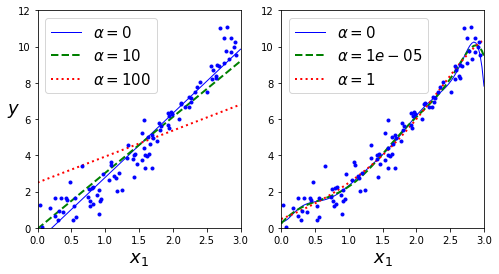

In [91]:
plt.figure(figsize=(8,4))

# Linear model with different alphas
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=47)
plt.ylabel("$y$", rotation=0, fontsize=18)

# Polynomial model with different alphas
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=47)
plt.show()

## Lasso Regression

**Lasso Regression** (or *Least Absolute Shrinkage and Selection Operator* Regression) is similar to Ridge Regression but uses the $\ell_1$ norm of the weight vector.

*Equation 10: Lasso Regression cost function*

\begin{equation*}
J(\boldsymbol{\theta})=\text{MSE}(\boldsymbol{\theta})+\alpha\sum^n_{i=1}|\theta_i|
\end{equation*}

*Equation 11: Lasso Regression subgradient vector*

\begin{equation*}
g(\boldsymbol{\theta},J)=\nabla_{\boldsymbol{\theta}}\text{MSE}(\boldsymbol{\theta})+\alpha
    \begin{pmatrix}
    \text{sign}(\theta_1)\\
    \text{sign}(\theta_2)\\
    \vdots\\
    \text{sign}(\theta_n)
    \end{pmatrix}
\text{ where } \text{sign}(\theta_i)=
    \begin{cases}
    -1 & \text{ if }\theta_i<0\\
    0 & \text{ if }\theta_i=0\\
    +1 & \text{ if }\theta_i>0
    \end{cases}
\end{equation*}

In [92]:
# Applying the closed-form Lasso Regression 
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.55882799])

In [93]:
# Stochastic gradient descent with regularization term l1 (same as Lasso)
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.63499447])

c:\users\codyt\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.120994745503793, tolerance: 0.09165305715392237
  positive)


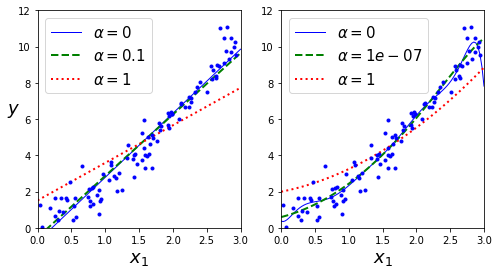

In [94]:
plt.figure(figsize=(8,4))

# Linear model with different alphas
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=47)
plt.ylabel("$y$", rotation=0, fontsize=18)

# Polynomial model with different alphas
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=47)
plt.show()

## Elastic Net

**Elastic Net** is a combination of Ridge Regression and Lasso Regression whose regularization term $r$ is between $0$ and $1$.

\begin{equation*}
\text{Elastic Net}=
    \begin{cases}
    \text{Ridge Regression}& \text{ if }r=0\\
    \vdots\\
    \text{Lasso Regression}& \text{ if }r=1
    \end{cases}
\end{equation*}

*Equation 12: Elastic Net cost function*

\begin{equation*}
J(\boldsymbol{\theta})=\text{MSE}(\boldsymbol{\theta})+r\alpha\sum^n_{i=1}|\theta_i|+\frac{1-r}{2}\alpha\sum^n_{i=1}\theta^2_i
\end{equation*}

- Ridge is useful when all features are important
- Lasso is better when only a few features are important
- Elastic is preferred over Lasso when there is high feature correlation or number of features, which can make Lasso more erratic

In [95]:
# Applying Elastic Net with r=0.5
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.56648424])

c:\users\codyt\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.131353037568225, tolerance: 0.09165305715392237
  positive)


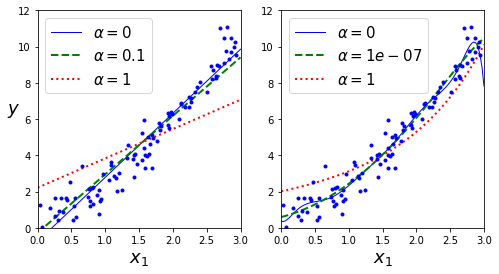

In [97]:
plt.figure(figsize=(8,4))

# Linear model with different alphas
plt.subplot(121)
plot_model(ElasticNet, polynomial=False, alphas=(0, 0.1, 1), random_state=47)
plt.ylabel("$y$", rotation=0, fontsize=18)

# Polynomial model with different alphas
plt.subplot(122)
plot_model(ElasticNet, polynomial=True, alphas=(0, 10**-7, 1), random_state=47)
plt.show()